<a href="https://colab.research.google.com/github/mutuceng/house-pricing/blob/main/Backend/ML/data_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [2]:
house_test = pd.read_csv('Dataset/test.csv')
house_train = pd.read_csv('Dataset/train.csv')

In [3]:
house_train.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
house_train.shape

(1460, 81)

In [5]:
# 81 column çok fazla azaltmak gerek

In [6]:
null_columns = house_train.isna().sum()
null_columns = null_columns[null_columns > 0]
null_columns

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
null_columns.count()


np.int64(19)

In [8]:
# 19 farklı column null değer içeriyor bunlardan en fazla null içerenler
# PoolQC, MiscFeature, Alley, Fence SAYILARI ÇOK ciddi

In [9]:
# Sütun isimleri pek anlaşılabilir değil ama çok sütun var azaltmadan türkçeleştirmeyelim

<Axes: >

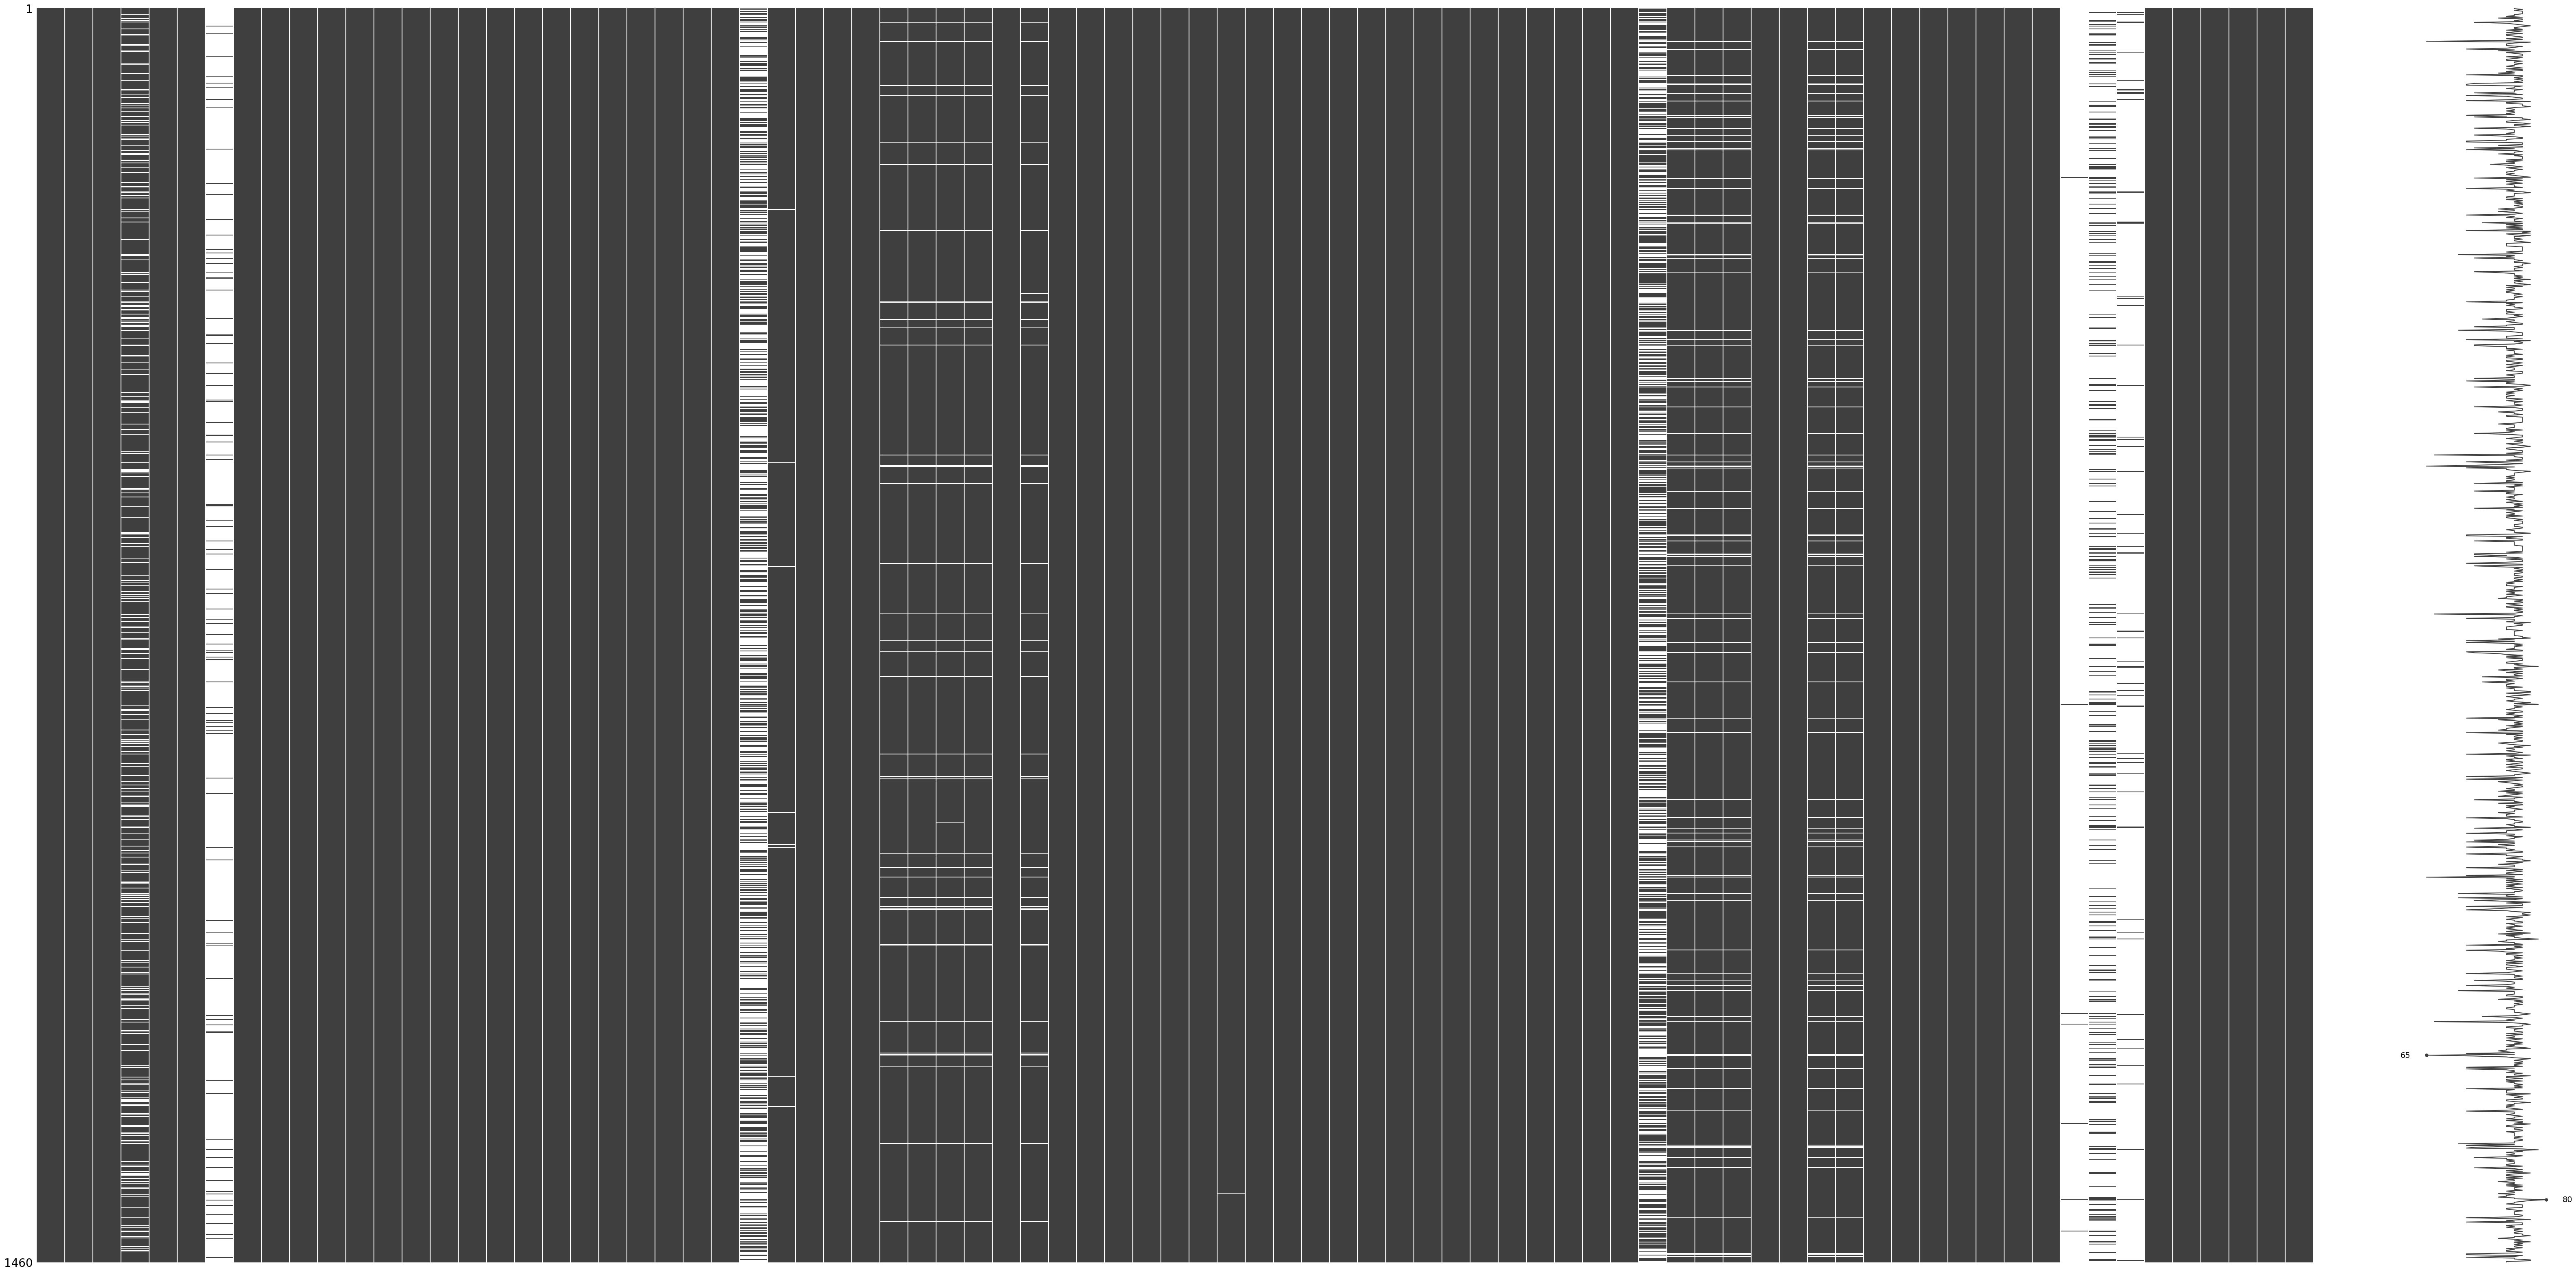

In [10]:
import missingno
missingno.matrix(house_train, figsize=(80, 40)) #genislik,yukselik

In [11]:
missing_ratio = house_train.isna().mean()
high_missing_columns = missing_ratio[missing_ratio > 0.6].index
high_missing_columns


Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [12]:
house_train["PoolQC"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1455    NaN
1456    NaN
1457    NaN
1458    NaN
1459    NaN
Name: PoolQC, Length: 1460, dtype: object

In [13]:
# Havuz kalitesi için sıralı kodlama
pool_mapping = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'No Pool': 0}
house_train['PoolQC'] = house_train['PoolQC'].fillna('No Pool')  # Eksik değerler 'No Pool' ile dolduruluyor
house_train['PoolQC'] = house_train['PoolQC'].map(pool_mapping)
house_train["PoolQC"]


0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: PoolQC, Length: 1460, dtype: int64

In [14]:
house_train["PoolQC"].unique()


array([0, 4, 1, 3])

In [15]:
house_train["PoolQC"].value_counts()

PoolQC
0    1453
3       3
4       2
1       2
Name: count, dtype: int64

In [16]:
#Şimdi Fence için benzer işlemleri yapalım

In [17]:
house_train["Fence"]

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
1455      NaN
1456    MnPrv
1457    GdPrv
1458      NaN
1459      NaN
Name: Fence, Length: 1460, dtype: object

In [18]:
house_train["Fence"].value_counts()

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

In [19]:
house_train['Fence'] = house_train['Fence'].fillna('No Fence')  # Eksik değerler 'No Fence' ile. dolduruluyor

In [20]:
house_train["Fence"].value_counts()

Fence
No Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: count, dtype: int64

In [21]:
# Fence kalitesi için sıralı kodlama
fence_mapping = {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'No Fence': 0}
house_train['Fence'] = house_train['Fence'].map(fence_mapping)
house_train["Fence"]

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    3
1457    4
1458    0
1459    0
Name: Fence, Length: 1460, dtype: int64

In [22]:
house_train["Fence"].value_counts()

Fence
0    1179
3     157
4      59
2      54
1      11
Name: count, dtype: int64

In [23]:
null_columns = house_train.isna().sum()
null_columns = null_columns[null_columns > 0]
null_columns

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
MiscFeature     1406
dtype: int64

In [24]:
# Alley ve MiscFeature

In [25]:
house_train["MiscFeature"].value_counts()

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64

In [26]:
house_train.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
677,678,30,RL,52.0,9022,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,0,5,2009,WD,Normal,109500
979,980,20,RL,80.0,8816,Pave,NaN,Reg,Lvl,AllPub,...,0,0,3,NaN,0,6,2009,WD,Normal,139000
980,981,85,RL,NaN,12122,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,0,7,2008,WD,Normal,178400
1378,1379,160,RM,21.0,1953,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,0,6,2006,WD,Normal,83000
1292,1293,70,RM,60.0,6600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,0,12,2009,WD,Normal,107500


In [27]:
house_train.drop(columns=["Id"], inplace=True)

In [28]:
house_train[["MiscFeature", "MiscVal"]].dropna(subset=["MiscFeature"]).sample(10)


,MiscFeature,MiscVal
794,Shed,500
392,Shed,1200
1200,Shed,0
439,Shed,800
767,Shed,1300
953,Shed,400
867,Shed,400
1061,Shed,560
1083,Shed,700
99,Shed,400


In [29]:
house_train[["MiscFeature", "MiscVal"]].dropna(subset=["MiscFeature"])

,MiscFeature,MiscVal
5,Shed,700
7,Shed,350
16,Shed,700
17,Shed,500
51,Shed,400
84,Shed,700
95,Shed,480
98,Shed,400
99,Shed,400
106,Shed,450


In [30]:
#MiscValue'su 0 olan değerleri ortalamalarıyla değiştiriyoruz

In [31]:
mean_miscval = house_train.groupby("MiscFeature")["MiscVal"].mean()
mean_miscval

MiscFeature
Gar2    11900.000000
Othr     1750.000000
Shed      697.836735
TenC     2000.000000
Name: MiscVal, dtype: float64

MiscFeature değeri olup, MiscVal değeri 0 olan satırlarda MiscVal'ı, aynı MiscFeature için
ortalama değeri ile değiştiriyoruz


In [32]:
mask = (house_train["MiscFeature"].notna()) & (house_train["MiscVal"] == 0)
house_train.loc[mask, "MiscVal"] = house_train.loc[mask, "MiscFeature"].map(mean_miscval)

C:\Users\Umutl\AppData\Local\Temp\ipykernel_13696\3937815068.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1750.          697.83673469]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  house_train.loc[mask, "MiscVal"] = house_train.loc[mask, "MiscFeature"].map(mean_miscval)


Değeri olmayan MiscVal kalmadı

In [33]:
print(house_train[mask])

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
873           40       RL         60.0    12144   Pave   NaN      Reg   
1200          20       RL         71.0     9353   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
873          Lvl    AllPub    Inside  ...        0      0     0        Othr   
1200         Lvl    AllPub    Inside  ...        0      0     0        Shed   

          MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
873   1750.000000      9    2009        WD         Normal     133000  
1200   697.836735      7    2006       Oth        Abnorml     116050  

[2 rows x 80 columns]


Böylelikle veri setini 1 sütun azaltmıs olduk

In [34]:
house_train.drop(columns=["MiscFeature"], inplace=True)

In [35]:
house_train.shape

(1460, 79)

Şimdi Alley ile uğraşma zamanı

In [36]:
house_train["Alley"].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

Alley mülk arazisine nasıl erişildiğini gösteren bir değişken ve bu kadar fazla Null içermesi mantıklı değil. Önceki methodu uygulayacak olursak yaklaşık bin ev için yol erişimi yok demek sağlıklı olmaz. Bu yüzden bu sütunu komple kaldırıyorum.

In [37]:
house_train.drop(columns=["Alley"], inplace=True)

In [38]:
house_train["MasVnrType"].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

MasVnrType evin dış cephesinde ne kullandıldığını gösteren bir değişken.
872 tane null içeren satırımız var bu attribute için. En çok tekrar eden değer açık ara farkla BrkFace ama 872 tanenin hepsini bunla doldurmak mantıklı mı?

In [39]:
house_train[["MasVnrType", "MasVnrArea"]].dropna(subset=["MasVnrType"]).sample(10)

,MasVnrType,MasVnrArea
700,BrkFace,630.0
70,BrkFace,1115.0
1361,Stone,16.0
101,BrkFace,336.0
1036,Stone,70.0
927,BrkFace,342.0
1242,BrkFace,81.0
279,BrkFace,299.0
1184,BrkFace,226.0
1093,BrkFace,166.0


MasVnrType ve MasVnrArea arasında bir ilişki kurup null değerleri o ilişkiye göre dolduramaz mıyım

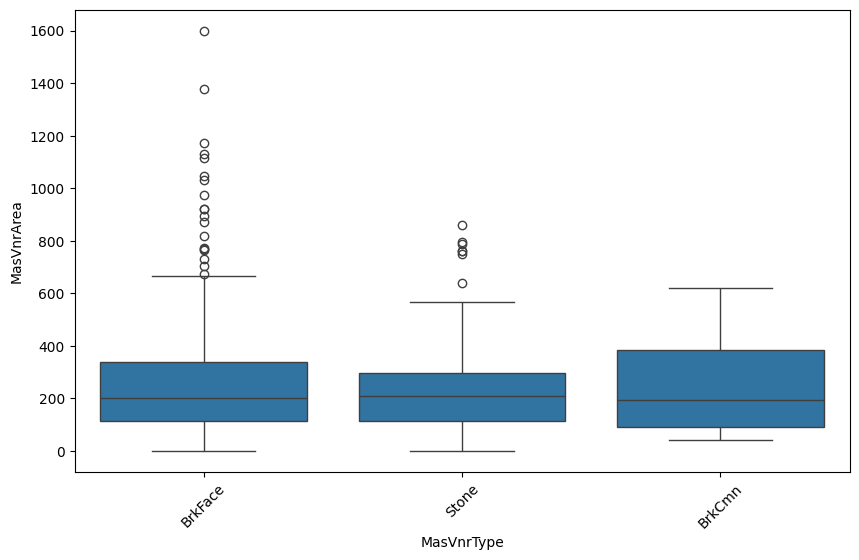

In [40]:
plt.figure(figsize=(10, 6))
sn.boxplot(x='MasVnrType', y='MasVnrArea', data=house_train)
plt.xticks(rotation=45)
plt.show()

In [41]:
mean_area_by_type = house_train.groupby('MasVnrType')['MasVnrArea'].mean()
mean_area_by_type

MasVnrType
BrkCmn     247.666667
BrkFace    259.008989
Stone      239.304688
Name: MasVnrArea, dtype: float64

Hemen hemen birbirlerine yakın MasVnrType değerleri alıyorlar. Bu yüzden ilişkiden bir şey elde edemedim ancak duvar kalınlıkları birbirine yakın oldugundan bu sütundan da kurtulabilirim

In [42]:
house_train.drop(columns=["MasVnrArea"], inplace=True)

tüm null değerleri en çok tekrar eden değerle doldurmak yerine null olmayan değerlerin yüzdesine göre doldursam mesela null olmayan değerlerin yüzde 60ı BrkFace ise null değerlerin %60ını BrkFace ile doldurayım

In [43]:
# MasVnrType'ın her bir değerinin yüzdesini hesaplayalım (null olmayanlar)
value_counts = house_train['MasVnrType'].value_counts(normalize=True)
print(value_counts)


MasVnrType
BrkFace    0.756803
Stone      0.217687
BrkCmn     0.025510
Name: proportion, dtype: float64


In [44]:
null_indices = house_train[house_train['MasVnrType'].isnull()].index

fill_values = np.random.choice(value_counts.index, size=len(null_indices), p=value_counts.values)

In [45]:
house_train.loc[null_indices, 'MasVnrType'] = fill_values

In [46]:
house_train["MasVnrType"].value_counts()

MasVnrType
BrkFace    1104
Stone       316
BrkCmn       40
Name: count, dtype: int64

In [47]:
house_train.shape

(1460, 77)

In [48]:
house_train["FireplaceQu"].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [49]:
house_train[["Fireplaces", "FireplaceQu"]].dropna(subset=["Fireplaces"]).sample(10)

,Fireplaces,FireplaceQu
1036,1,Ex
1070,0,NaN
1057,1,Gd
822,1,Gd
539,1,TA
17,0,NaN
1189,1,TA
611,1,TA
286,1,Gd
1208,0,NaN


In [50]:
fireplace_quality_zeros = house_train[house_train['Fireplaces'] == 0]['FireplaceQu']
print(fireplace_quality_zeros)

0       NaN
5       NaN
10      NaN
12      NaN
15      NaN
       ... 
1452    NaN
1453    NaN
1454    NaN
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 690, dtype: object


In [51]:
house_train["Fireplaces"].value_counts()

Fireplaces
0    690
1    650
2    115
3      5
Name: count, dtype: int64

Burada da null değerleri şöminesi olmayan satırların değerleri 

In [52]:
# Şömine kalitesi için sıralı kodlama
pool_mapping = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'No Fireplace': 0}
house_train['FireplaceQu'] = house_train['FireplaceQu'].fillna('No Fireplace')  # Eksik değerler 'No Pool' ile dolduruluyor
house_train['FireplaceQu'] = house_train['FireplaceQu'].map(pool_mapping)
house_train["FireplaceQu"]

0       0.0
1       2.0
2       2.0
3       3.0
4       2.0
       ... 
1455    2.0
1456    2.0
1457    3.0
1458    0.0
1459    0.0
Name: FireplaceQu, Length: 1460, dtype: float64

In [53]:
house_train["FireplaceQu"].value_counts()

FireplaceQu
0.0    690
3.0    380
2.0    313
1.0     33
4.0     24
Name: count, dtype: int64

In [54]:
house_train['FireplaceScore'] = house_train['Fireplaces'] * house_train['FireplaceQu']

In [55]:
house_train["FireplaceScore"].value_counts()

FireplaceScore
0.0     690
3.0     325
2.0     263
4.0      72
6.0      55
1.0      28
8.0       4
9.0       2
12.0      1
Name: count, dtype: int64

In [57]:
house_train = house_train.drop(columns=['Fireplaces', 'FireplaceQu'])


In [58]:
house_train.shape

(1460, 76)

In [63]:
null_columns = house_train.isna().sum()
null_columns = null_columns[null_columns > 0]
null_columns

LotFrontage       259
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Electrical          1
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
GarageCond         81
FireplaceScore     20
dtype: int64

In [64]:
house_train["LotFrontage"].sample(5)

951     60.0
632     85.0
110     75.0
1343    57.0
268     71.0
Name: LotFrontage, dtype: float64

In [ ]:
correlation = house_train[['LotFrontage', 'SalePrice']].corr()
print(correlation)

             LotFrontage  SalePrice
LotFrontage     1.000000   0.351799
SalePrice       0.351799   1.000000


In [67]:
numerical_features = house_train.select_dtypes(include=[np.number]).columns
numerical_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'MoSold',
       'YrSold', 'SalePrice', 'FireplaceScore'],
      dtype='object')

In [68]:
numerical_columns = house_train.select_dtypes(include=['int64', 'float64']).columns

# Hedef değişken ile korelasyon hesaplama
correlation_with_target = house_train[numerical_columns].corr()['SalePrice'].sort_values(ascending=False)

print(correlation_with_target)


SalePrice         1.000000
OverallQual       0.790982
GrLivArea         0.708624
GarageCars        0.640409
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
FullBath          0.560664
TotRmsAbvGrd      0.533723
YearBuilt         0.522897
FireplaceScore    0.513011
YearRemodAdd      0.507101
GarageYrBlt       0.486362
BsmtFinSF1        0.386420
LotFrontage       0.351799
WoodDeckSF        0.324413
2ndFlrSF          0.319334
OpenPorchSF       0.315856
HalfBath          0.284108
LotArea           0.263843
BsmtFullBath      0.227122
BsmtUnfSF         0.214479
BedroomAbvGr      0.168213
PoolQC            0.115484
ScreenPorch       0.111447
PoolArea          0.092404
MoSold            0.046432
3SsnPorch         0.044584
BsmtFinSF2       -0.011378
BsmtHalfBath     -0.016844
MiscVal          -0.023327
LowQualFinSF     -0.025606
YrSold           -0.028923
OverallCond      -0.077856
MSSubClass       -0.084284
EnclosedPorch    -0.128578
KitchenAbvGr     -0.135907
F

In [70]:
low_correlation = correlation_with_target[correlation_with_target < 0.5]
print(low_correlation)

GarageYrBlt      0.486362
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
PoolQC           0.115484
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.023327
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Fence           -0.146942
Name: SalePrice, dtype: float64


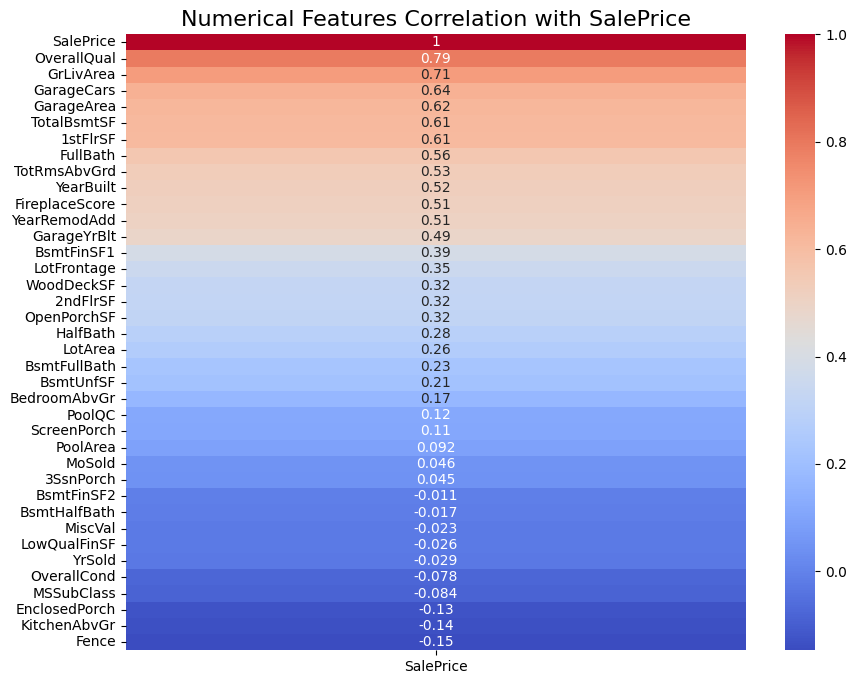

In [71]:
correlation_matrix = house_train[numerical_columns].corr()

# Hedef değişken ile korelasyonları görselleştirme
plt.figure(figsize=(10, 8))
sn.heatmap(correlation_matrix[['SalePrice']].sort_values(by='SalePrice', ascending=False), 
            annot=True, cmap='coolwarm', cbar=True)

plt.title('Numerical Features Correlation with SalePrice', fontsize=16)
plt.show()

In [59]:
house_train["SalePrice"].mean()

np.float64(180921.19589041095)

In [60]:
house_train["SalePrice"].std()

np.float64(79442.50288288662)

In [61]:
numerical_features = house_train.select_dtypes(include=[np.number]).columns
numerical_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'MoSold',
       'YrSold', 'SalePrice', 'FireplaceScore'],
      dtype='object')

In [62]:
categorical_features = house_train.select_dtypes(include=[object]).columns
categorical_features

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

Neredeyse yarı yarıya